In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [217]:
in_out_history=pd.read_csv("checkin_checkout_history_updated.csv")
gym_location=pd.read_csv("gym_locations_data.csv")
subscription_plan=pd.read_csv("subscription_plans.csv")
user_data=pd.read_csv("users_data.csv")

In [219]:
in_out_history

,user_id,gym_id,checkin_time,checkout_time,workout_type,calories_burned
0,user_3291,gym_6,2023-09-10 15:55:00,2023-09-10 16:34:00,Weightlifting,462
1,user_1944,gym_2,2023-04-13 20:07:00,2023-04-13 22:43:00,Yoga,1278
2,user_958,gym_7,2023-06-10 12:24:00,2023-06-10 13:49:00,Cardio,858
3,user_811,gym_2,2023-05-23 17:11:00,2023-05-23 20:01:00,Yoga,1134
4,user_4923,gym_10,2023-02-21 06:20:00,2023-02-21 08:02:00,Weightlifting,1049
...,...,...,...,...,...,...
299995,user_3995,gym_3,2023-08-06 17:25:00,2023-08-06 18:09:00,Pilates,288
299996,user_206,gym_9,2023-06-27 13:14:00,2023-06-27 16:04:00,Weightlifting,1935
299997,user_4983,gym_4,2023-04-08 14:41:00,2023-04-08 15:54:00,Cardio,1312
299998,user_1028,gym_10,2023-03-05 06:07:00,2023-03-05 07:04:00,Cardio,787


In [221]:
gym_location

,gym_id,location,gym_type,facilities
0,gym_1,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court"
1,gym_2,Los Angeles,Budget,"Climbing Wall, Yoga Classes, Sauna"
2,gym_3,Chicago,Budget,"Sauna, Climbing Wall, Swimming Pool"
3,gym_4,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool"
4,gym_5,Phoenix,Standard,"Basketball Court, CrossFit, Swimming Pool"
5,gym_6,Philadelphia,Budget,"Swimming Pool, Climbing Wall, Sauna"
6,gym_7,San Antonio,Premium,"Sauna, Basketball Court, Swimming Pool"
7,gym_8,San Diego,Standard,"Basketball Court, Sauna, CrossFit"
8,gym_9,Dallas,Premium,"Sauna, CrossFit, Yoga Classes"
9,gym_10,San Jose,Premium,"Swimming Pool, Sauna, CrossFit"


In [223]:
subscription_plan

,subscription_plan,price_per_month,features
0,Basic,19.99,"Access to basic gym facilities, Limited class ..."
1,Pro,49.99,"Access to all facilities, Unlimited class acce..."
2,Student,9.99,"Access to basic facilities, Limited class acce..."


In [225]:
user_data

,user_id,first_name,last_name,age,gender,birthdate,sign_up_date,user_location,subscription_plan
0,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic
1,user_2,Michael,Miller,46,Non-binary,1978-12-22,2023-08-08,Orlando,Pro
2,user_3,Daniel,Smith,32,Female,1962-08-30,2021-01-11,Orlando,Basic
3,user_4,David,Smith,60,Male,2003-12-05,2023-08-07,Denver,Pro
4,user_5,Chris,Jones,25,Female,2004-08-25,2021-01-08,Denver,Basic
...,...,...,...,...,...,...,...,...,...
4995,user_4996,Sarah,Williams,33,Male,1958-01-13,2021-08-08,Las Vegas,Basic
4996,user_4997,Linda,Brown,22,Male,1974-02-20,2023-01-22,Austin,Student
4997,user_4998,Emily,Miller,38,Non-binary,1978-03-29,2021-04-16,Atlanta,Pro
4998,user_4999,Robert,Garcia,27,Male,2002-02-01,2022-07-02,Denver,Pro


In [227]:
user_data.isnull().sum()

user_id              0
first_name           0
last_name            0
age                  0
gender               0
birthdate            0
sign_up_date         0
user_location        0
subscription_plan    0
dtype: int64

In [229]:
in_out_history.isnull().sum()

user_id            0
gym_id             0
checkin_time       0
checkout_time      0
workout_type       0
calories_burned    0
dtype: int64

In [231]:
in_out_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   user_id          300000 non-null  object
 1   gym_id           300000 non-null  object
 2   checkin_time     300000 non-null  object
 3   checkout_time    300000 non-null  object
 4   workout_type     300000 non-null  object
 5   calories_burned  300000 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 13.7+ MB


In [233]:
user_data.describe()

,age
count,5000.00000
mean,41.16820
std,13.53105
min,18.00000
25%,29.00000
50%,41.00000
75%,53.00000
max,64.00000


In [235]:
user=pd.merge(user_data,in_out_history,on="user_id",how="left")

In [237]:
user

,user_id,first_name,last_name,age,gender,birthdate,sign_up_date,user_location,subscription_plan,gym_id,checkin_time,checkout_time,workout_type,calories_burned
0,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_8,2023-03-19 08:22:00,2023-03-19 10:36:00,Swimming,468
1,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_9,2023-03-31 15:50:00,2023-03-31 17:52:00,Pilates,1344
2,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_4,2023-08-26 07:22:00,2023-08-26 09:04:00,Yoga,347
3,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_8,2023-03-29 20:40:00,2023-03-29 22:56:00,CrossFit,649
4,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_9,2023-05-02 11:49:00,2023-05-02 13:41:00,CrossFit,1136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,user_5000,Chris,Smith,36,Male,1959-11-21,2022-02-20,Seattle,Student,gym_4,2023-10-06 11:05:00,2023-10-06 13:47:00,CrossFit,789
299996,user_5000,Chris,Smith,36,Male,1959-11-21,2022-02-20,Seattle,Student,gym_1,2023-06-07 12:18:00,2023-06-07 13:07:00,Swimming,633
299997,user_5000,Chris,Smith,36,Male,1959-11-21,2022-02-20,Seattle,Student,gym_9,2023-06-02 11:01:00,2023-06-02 12:15:00,Cardio,431
299998,user_5000,Chris,Smith,36,Male,1959-11-21,2022-02-20,Seattle,Student,gym_1,2023-07-29 09:19:00,2023-07-29 10:08:00,Pilates,1714


In [239]:
user=pd.merge(user,gym_location,on="gym_id",how='left')

In [241]:
user

,user_id,first_name,last_name,age,gender,birthdate,sign_up_date,user_location,subscription_plan,gym_id,checkin_time,checkout_time,workout_type,calories_burned,location,gym_type,facilities
0,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_8,2023-03-19 08:22:00,2023-03-19 10:36:00,Swimming,468,San Diego,Standard,"Basketball Court, Sauna, CrossFit"
1,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_9,2023-03-31 15:50:00,2023-03-31 17:52:00,Pilates,1344,Dallas,Premium,"Sauna, CrossFit, Yoga Classes"
2,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_4,2023-08-26 07:22:00,2023-08-26 09:04:00,Yoga,347,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool"
3,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_8,2023-03-29 20:40:00,2023-03-29 22:56:00,CrossFit,649,San Diego,Standard,"Basketball Court, Sauna, CrossFit"
4,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_9,2023-05-02 11:49:00,2023-05-02 13:41:00,CrossFit,1136,Dallas,Premium,"Sauna, CrossFit, Yoga Classes"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,user_5000,Chris,Smith,36,Male,1959-11-21,2022-02-20,Seattle,Student,gym_4,2023-10-06 11:05:00,2023-10-06 13:47:00,CrossFit,789,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool"
299996,user_5000,Chris,Smith,36,Male,1959-11-21,2022-02-20,Seattle,Student,gym_1,2023-06-07 12:18:00,2023-06-07 13:07:00,Swimming,633,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court"
299997,user_5000,Chris,Smith,36,Male,1959-11-21,2022-02-20,Seattle,Student,gym_9,2023-06-02 11:01:00,2023-06-02 12:15:00,Cardio,431,Dallas,Premium,"Sauna, CrossFit, Yoga Classes"
299998,user_5000,Chris,Smith,36,Male,1959-11-21,2022-02-20,Seattle,Student,gym_1,2023-07-29 09:19:00,2023-07-29 10:08:00,Pilates,1714,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court"


In [243]:
user=pd.merge(user,subscription_plan,on="subscription_plan",how="left")

In [245]:
user

,user_id,first_name,last_name,age,gender,birthdate,sign_up_date,user_location,subscription_plan,gym_id,checkin_time,checkout_time,workout_type,calories_burned,location,gym_type,facilities,price_per_month,features
0,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_8,2023-03-19 08:22:00,2023-03-19 10:36:00,Swimming,468,San Diego,Standard,"Basketball Court, Sauna, CrossFit",19.99,"Access to basic gym facilities, Limited class ..."
1,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_9,2023-03-31 15:50:00,2023-03-31 17:52:00,Pilates,1344,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",19.99,"Access to basic gym facilities, Limited class ..."
2,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_4,2023-08-26 07:22:00,2023-08-26 09:04:00,Yoga,347,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool",19.99,"Access to basic gym facilities, Limited class ..."
3,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_8,2023-03-29 20:40:00,2023-03-29 22:56:00,CrossFit,649,San Diego,Standard,"Basketball Court, Sauna, CrossFit",19.99,"Access to basic gym facilities, Limited class ..."
4,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_9,2023-05-02 11:49:00,2023-05-02 13:41:00,CrossFit,1136,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",19.99,"Access to basic gym facilities, Limited class ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,user_5000,Chris,Smith,36,Male,1959-11-21,2022-02-20,Seattle,Student,gym_4,2023-10-06 11:05:00,2023-10-06 13:47:00,CrossFit,789,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool",9.99,"Access to basic facilities, Limited class acce..."
299996,user_5000,Chris,Smith,36,Male,1959-11-21,2022-02-20,Seattle,Student,gym_1,2023-06-07 12:18:00,2023-06-07 13:07:00,Swimming,633,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court",9.99,"Access to basic facilities, Limited class acce..."
299997,user_5000,Chris,Smith,36,Male,1959-11-21,2022-02-20,Seattle,Student,gym_9,2023-06-02 11:01:00,2023-06-02 12:15:00,Cardio,431,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",9.99,"Access to basic facilities, Limited class acce..."
299998,user_5000,Chris,Smith,36,Male,1959-11-21,2022-02-20,Seattle,Student,gym_1,2023-07-29 09:19:00,2023-07-29 10:08:00,Pilates,1714,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court",9.99,"Access to basic facilities, Limited class acce..."


In [247]:
user.head()

,user_id,first_name,last_name,age,gender,birthdate,sign_up_date,user_location,subscription_plan,gym_id,checkin_time,checkout_time,workout_type,calories_burned,location,gym_type,facilities,price_per_month,features
0,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_8,2023-03-19 08:22:00,2023-03-19 10:36:00,Swimming,468,San Diego,Standard,"Basketball Court, Sauna, CrossFit",19.99,"Access to basic gym facilities, Limited class ..."
1,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_9,2023-03-31 15:50:00,2023-03-31 17:52:00,Pilates,1344,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",19.99,"Access to basic gym facilities, Limited class ..."
2,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_4,2023-08-26 07:22:00,2023-08-26 09:04:00,Yoga,347,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool",19.99,"Access to basic gym facilities, Limited class ..."
3,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_8,2023-03-29 20:40:00,2023-03-29 22:56:00,CrossFit,649,San Diego,Standard,"Basketball Court, Sauna, CrossFit",19.99,"Access to basic gym facilities, Limited class ..."
4,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_9,2023-05-02 11:49:00,2023-05-02 13:41:00,CrossFit,1136,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",19.99,"Access to basic gym facilities, Limited class ..."


In [249]:
user["name"] = user["first_name"]+ " " + user["last_name"]

In [251]:
user

,user_id,first_name,last_name,age,gender,birthdate,sign_up_date,user_location,subscription_plan,gym_id,checkin_time,checkout_time,workout_type,calories_burned,location,gym_type,facilities,price_per_month,features,name
0,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_8,2023-03-19 08:22:00,2023-03-19 10:36:00,Swimming,468,San Diego,Standard,"Basketball Court, Sauna, CrossFit",19.99,"Access to basic gym facilities, Limited class ...",Chris Wilson
1,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_9,2023-03-31 15:50:00,2023-03-31 17:52:00,Pilates,1344,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",19.99,"Access to basic gym facilities, Limited class ...",Chris Wilson
2,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_4,2023-08-26 07:22:00,2023-08-26 09:04:00,Yoga,347,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool",19.99,"Access to basic gym facilities, Limited class ...",Chris Wilson
3,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_8,2023-03-29 20:40:00,2023-03-29 22:56:00,CrossFit,649,San Diego,Standard,"Basketball Court, Sauna, CrossFit",19.99,"Access to basic gym facilities, Limited class ...",Chris Wilson
4,user_1,Chris,Wilson,56,Female,2000-02-29,2023-02-06,Denver,Basic,gym_9,2023-05-02 11:49:00,2023-05-02 13:41:00,CrossFit,1136,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",19.99,"Access to basic gym facilities, Limited class ...",Chris Wilson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,user_5000,Chris,Smith,36,Male,1959-11-21,2022-02-20,Seattle,Student,gym_4,2023-10-06 11:05:00,2023-10-06 13:47:00,CrossFit,789,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool",9.99,"Access to basic facilities, Limited class acce...",Chris Smith
299996,user_5000,Chris,Smith,36,Male,1959-11-21,2022-02-20,Seattle,Student,gym_1,2023-06-07 12:18:00,2023-06-07 13:07:00,Swimming,633,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court",9.99,"Access to basic facilities, Limited class acce...",Chris Smith
299997,user_5000,Chris,Smith,36,Male,1959-11-21,2022-02-20,Seattle,Student,gym_9,2023-06-02 11:01:00,2023-06-02 12:15:00,Cardio,431,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",9.99,"Access to basic facilities, Limited class acce...",Chris Smith
299998,user_5000,Chris,Smith,36,Male,1959-11-21,2022-02-20,Seattle,Student,gym_1,2023-07-29 09:19:00,2023-07-29 10:08:00,Pilates,1714,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court",9.99,"Access to basic facilities, Limited class acce...",Chris Smith


In [253]:
user=user.drop(["first_name","last_name","birthdate"],axis=1)

In [255]:
df=user.iloc[:,0:1].join(user.iloc[:,-1]).join(user.iloc[:,1:-1])

In [257]:
df

,user_id,name,age,gender,sign_up_date,user_location,subscription_plan,gym_id,checkin_time,checkout_time,workout_type,calories_burned,location,gym_type,facilities,price_per_month,features
0,user_1,Chris Wilson,56,Female,2023-02-06,Denver,Basic,gym_8,2023-03-19 08:22:00,2023-03-19 10:36:00,Swimming,468,San Diego,Standard,"Basketball Court, Sauna, CrossFit",19.99,"Access to basic gym facilities, Limited class ..."
1,user_1,Chris Wilson,56,Female,2023-02-06,Denver,Basic,gym_9,2023-03-31 15:50:00,2023-03-31 17:52:00,Pilates,1344,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",19.99,"Access to basic gym facilities, Limited class ..."
2,user_1,Chris Wilson,56,Female,2023-02-06,Denver,Basic,gym_4,2023-08-26 07:22:00,2023-08-26 09:04:00,Yoga,347,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool",19.99,"Access to basic gym facilities, Limited class ..."
3,user_1,Chris Wilson,56,Female,2023-02-06,Denver,Basic,gym_8,2023-03-29 20:40:00,2023-03-29 22:56:00,CrossFit,649,San Diego,Standard,"Basketball Court, Sauna, CrossFit",19.99,"Access to basic gym facilities, Limited class ..."
4,user_1,Chris Wilson,56,Female,2023-02-06,Denver,Basic,gym_9,2023-05-02 11:49:00,2023-05-02 13:41:00,CrossFit,1136,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",19.99,"Access to basic gym facilities, Limited class ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,user_5000,Chris Smith,36,Male,2022-02-20,Seattle,Student,gym_4,2023-10-06 11:05:00,2023-10-06 13:47:00,CrossFit,789,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool",9.99,"Access to basic facilities, Limited class acce..."
299996,user_5000,Chris Smith,36,Male,2022-02-20,Seattle,Student,gym_1,2023-06-07 12:18:00,2023-06-07 13:07:00,Swimming,633,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court",9.99,"Access to basic facilities, Limited class acce..."
299997,user_5000,Chris Smith,36,Male,2022-02-20,Seattle,Student,gym_9,2023-06-02 11:01:00,2023-06-02 12:15:00,Cardio,431,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",9.99,"Access to basic facilities, Limited class acce..."
299998,user_5000,Chris Smith,36,Male,2022-02-20,Seattle,Student,gym_1,2023-07-29 09:19:00,2023-07-29 10:08:00,Pilates,1714,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court",9.99,"Access to basic facilities, Limited class acce..."


In [259]:
#univariate analysis

In [261]:
#1 Gender
#2 Subscription
#3 Workout type 
#4 gym_type

<Axes: xlabel='age', ylabel='Count'>

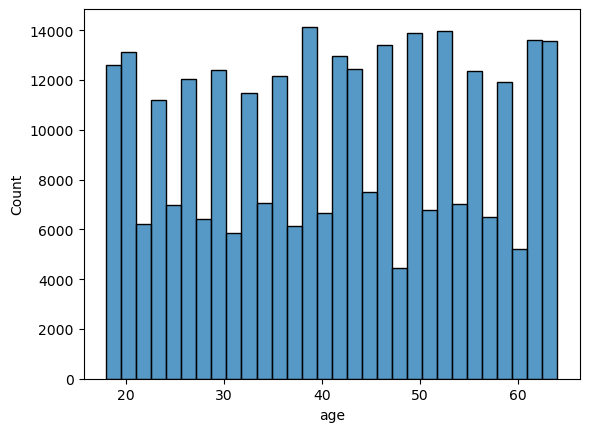

In [263]:
sns.histplot(user["age"],bins=30)

<Axes: xlabel='subscription_plan', ylabel='count'>

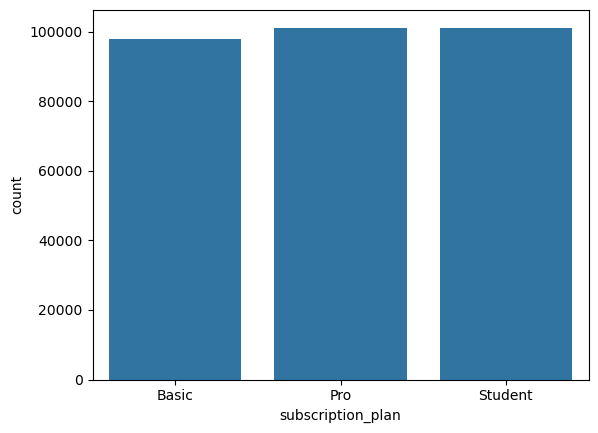

In [265]:
sns.countplot(x=user["subscription_plan"])

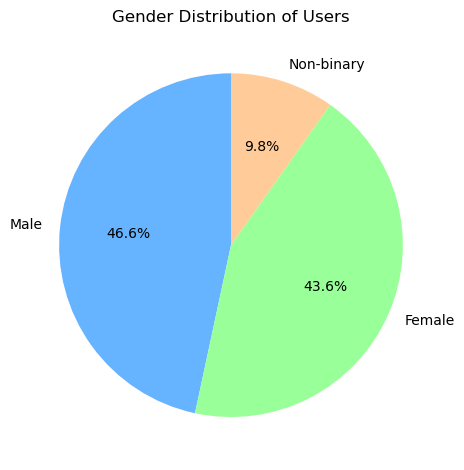

In [267]:
gender_counts = user['gender'].value_counts()
plt.pie(gender_counts, labels = gender_counts.index, autopct = '%1.1f%%', startangle=90, colors = ['#66b3ff','#99ff99','#ffcc99'])
plt.title('Gender Distribution of Users')
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

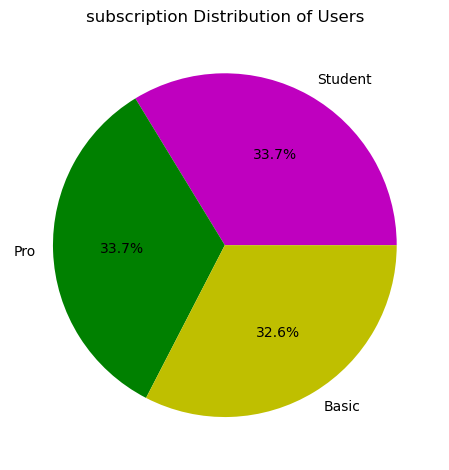

In [269]:
sub_count = user['subscription_plan'].value_counts()
plt.pie(sub_count, labels = sub_count.index, autopct = '%1.1f%%', colors = ['m','g','y'])
plt.title('subscription Distribution of Users')
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

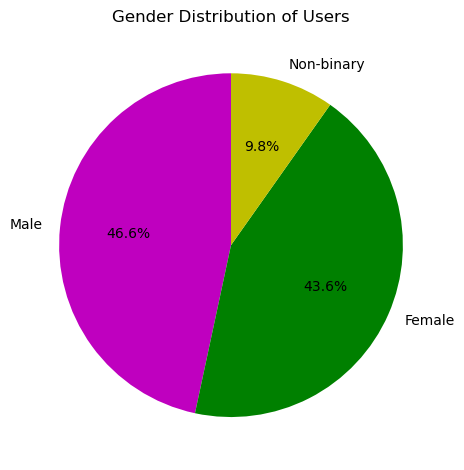

In [271]:
gender_counts = user['gender'].value_counts()
plt.pie(gender_counts, labels = gender_counts.index, autopct = '%1.1f%%', startangle=90, colors = ['m','g','y'])
plt.title('Gender Distribution of Users')
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

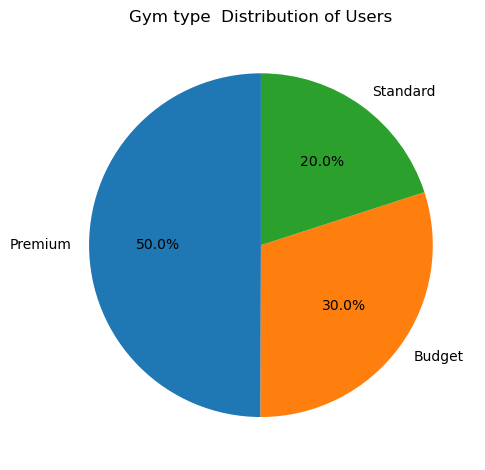

In [273]:
gymtype = user['gym_type'].value_counts()
plt.pie(gymtype, labels = gymtype.index, autopct = '%1.1f%%', startangle=90)
plt.title('Gym type  Distribution of Users')
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [275]:
#Bivariate/Multivariate Analysis

In [277]:
#subscription type and their charges as per location

([0, 1, 2], [Text(0, 0, 'Basic'), Text(1, 0, 'Pro'), Text(2, 0, 'Student')])

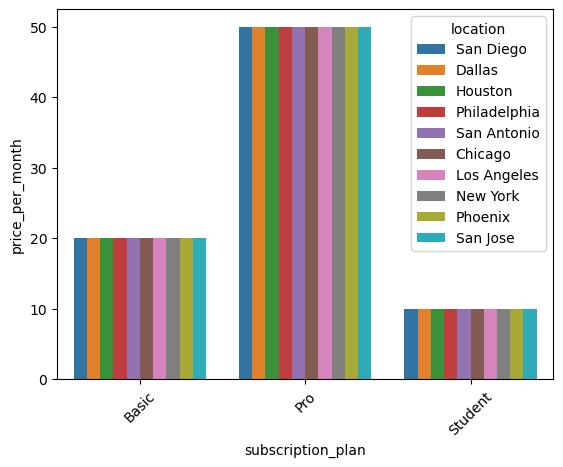

In [279]:
sns.barplot(x=user["subscription_plan"],y=user["price_per_month"],hue=user["location"])
plt.xticks(rotation=45)

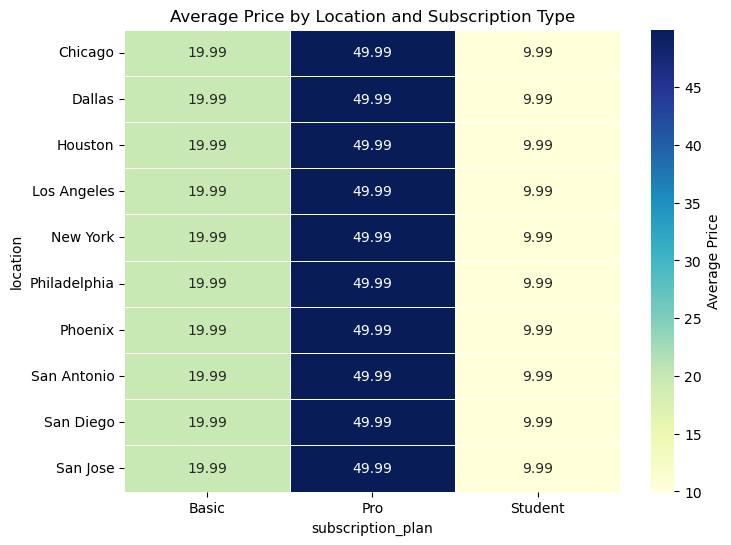

In [280]:
pivot_table = df.pivot_table(index='location', columns='subscription_plan', values='price_per_month', aggfunc='mean')

# Step 2: Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5, cbar_kws={'label': 'Average Price'})
plt.title('Average Price by Location and Subscription Type')
plt.show()

In [281]:
#Analysis shows Price varies as per the subscription_plan and is independent of gym_type and location.

In [282]:
user["name"].value_counts()

name
Chris Miller         2951
Jessica Rodriguez    2882
Emily Jones          2869
David Moore          2864
Jane Miller          2811
                     ... 
Laura Smith          1351
Linda Brown          1332
Jessica Wilson       1322
John Rodriguez       1185
Jessica Johnson       951
Name: count, Length: 144, dtype: int64

In [283]:
#which gender in each location prefer which type of workout ?

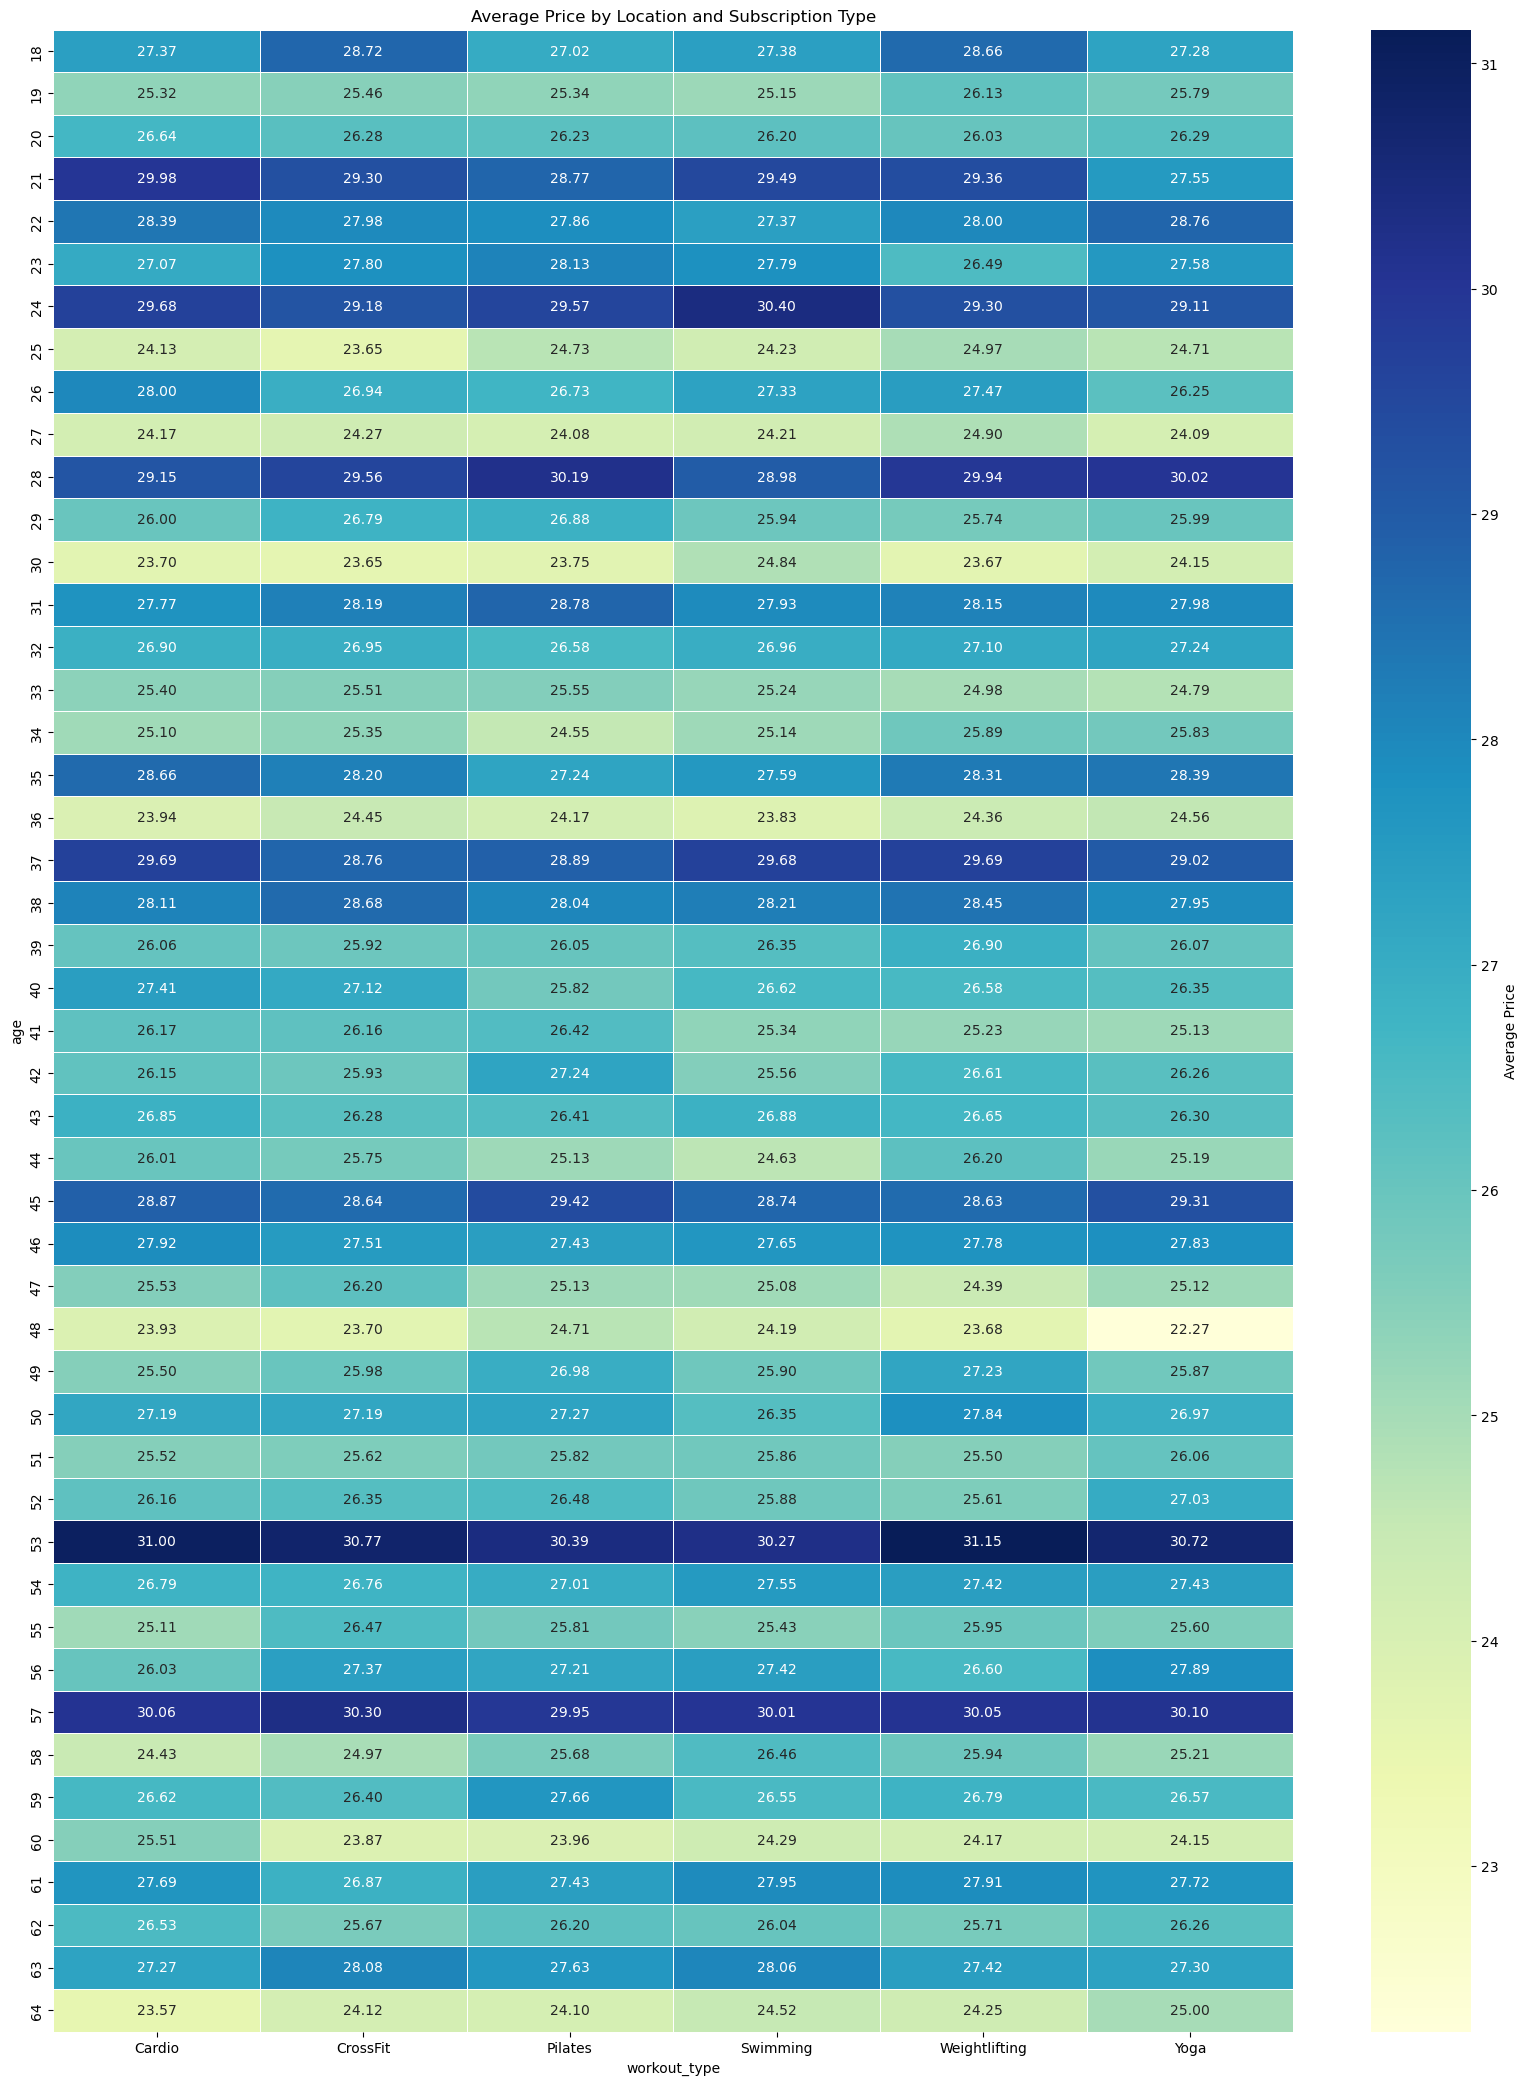

In [285]:
pivot_table = df.pivot_table(index='age', columns='workout_type', values='price_per_month')

# Step 2: Plot the heatmap
plt.figure(figsize=(20,26))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5, cbar_kws={'label': 'Average Price'})
plt.title('Average Price by Age and Workout')
plt.show()

In [291]:
user["age"]

0         56
1         56
2         56
3         56
4         56
          ..
299995    36
299996    36
299997    36
299998    36
299999    36
Name: age, Length: 300000, dtype: int64

In [295]:
# from the above analysis age corresponding to the darker shades have opted for PRO subscription or are paying more in the gym 
## Another important observation is that certain age groups which are more paying more in gym are almost equally investing in all workout types

<Axes: xlabel='age', ylabel='calories_burned'>

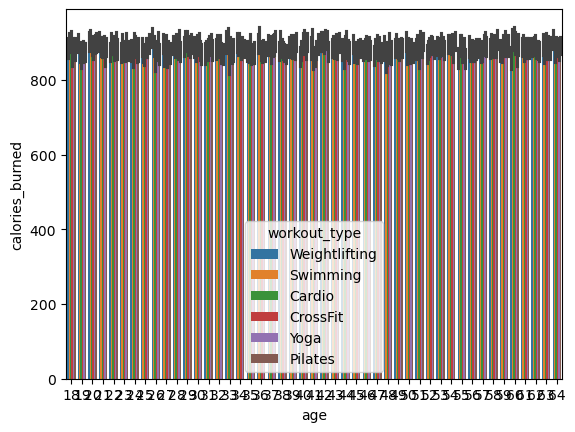

In [297]:
sns.barplot(x=user["age"],y=user["calories_burned"],hue=user["workout_type"])

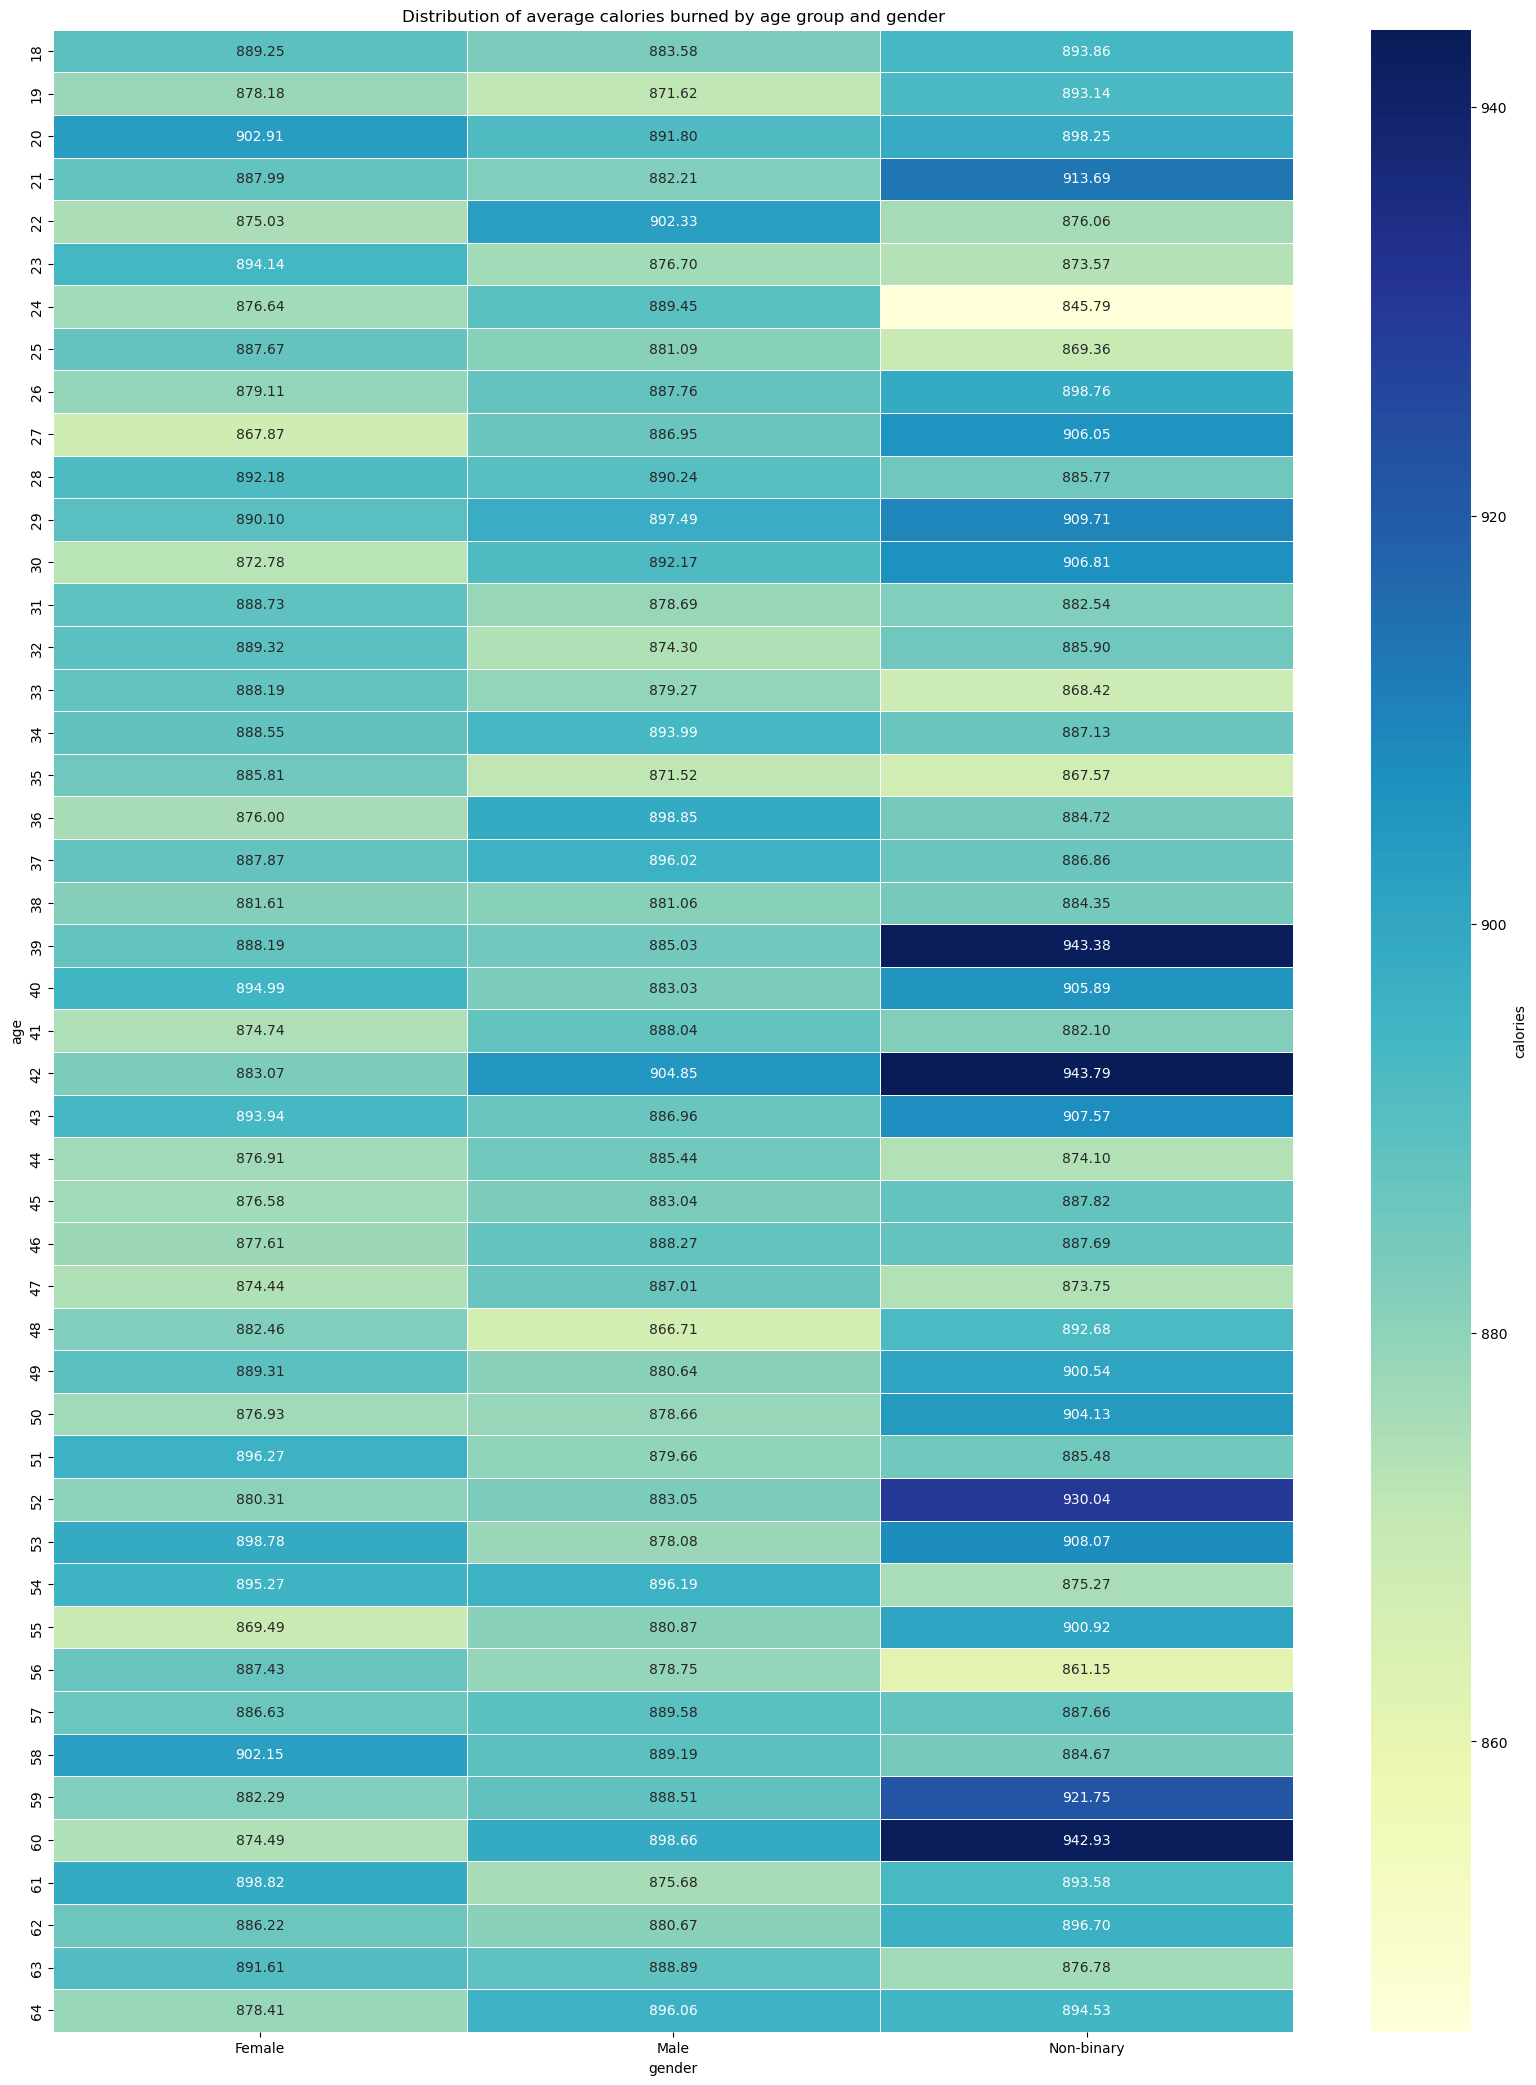

In [307]:
plt.figure(figsize=(20, 26))
sns.heatmap(pv, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5, cbar_kws={'label': 'calories'})
plt.title('Distribution of average calories burned by age group and gender')
plt.show()

In [309]:
### the analysis shows that the average calories burnt by each age group everyday is above 845. 
### It can also be seen that for most age groups,non- binary gender has burnt more calories.

In [311]:
user

,user_id,age,gender,sign_up_date,user_location,subscription_plan,gym_id,checkin_time,checkout_time,workout_type,calories_burned,location,gym_type,facilities,price_per_month,features,name
0,user_1,56,Female,2023-02-06,Denver,Basic,gym_8,2023-03-19 08:22:00,2023-03-19 10:36:00,Swimming,468,San Diego,Standard,"Basketball Court, Sauna, CrossFit",19.99,"Access to basic gym facilities, Limited class ...",Chris Wilson
1,user_1,56,Female,2023-02-06,Denver,Basic,gym_9,2023-03-31 15:50:00,2023-03-31 17:52:00,Pilates,1344,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",19.99,"Access to basic gym facilities, Limited class ...",Chris Wilson
2,user_1,56,Female,2023-02-06,Denver,Basic,gym_4,2023-08-26 07:22:00,2023-08-26 09:04:00,Yoga,347,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool",19.99,"Access to basic gym facilities, Limited class ...",Chris Wilson
3,user_1,56,Female,2023-02-06,Denver,Basic,gym_8,2023-03-29 20:40:00,2023-03-29 22:56:00,CrossFit,649,San Diego,Standard,"Basketball Court, Sauna, CrossFit",19.99,"Access to basic gym facilities, Limited class ...",Chris Wilson
4,user_1,56,Female,2023-02-06,Denver,Basic,gym_9,2023-05-02 11:49:00,2023-05-02 13:41:00,CrossFit,1136,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",19.99,"Access to basic gym facilities, Limited class ...",Chris Wilson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,user_5000,36,Male,2022-02-20,Seattle,Student,gym_4,2023-10-06 11:05:00,2023-10-06 13:47:00,CrossFit,789,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool",9.99,"Access to basic facilities, Limited class acce...",Chris Smith
299996,user_5000,36,Male,2022-02-20,Seattle,Student,gym_1,2023-06-07 12:18:00,2023-06-07 13:07:00,Swimming,633,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court",9.99,"Access to basic facilities, Limited class acce...",Chris Smith
299997,user_5000,36,Male,2022-02-20,Seattle,Student,gym_9,2023-06-02 11:01:00,2023-06-02 12:15:00,Cardio,431,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",9.99,"Access to basic facilities, Limited class acce...",Chris Smith
299998,user_5000,36,Male,2022-02-20,Seattle,Student,gym_1,2023-07-29 09:19:00,2023-07-29 10:08:00,Pilates,1714,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court",9.99,"Access to basic facilities, Limited class acce...",Chris Smith
